<div style="background-image: linear-gradient(to right, #4b4cff , #00d4ff); text-align: center; padding: 50px;">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 48px; color: white; text-shadow: 2px 2px #4b4cff;">
    Pattern Recognition and Biometrics
  </h1>
</div>

PRUDHOMME Pierre 


DESRUMEAUX Lucas

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Library
</h2>

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Data
</h2>

In [2]:
data = pd.read_csv("./data/titanic.csv")

<h1 style="color:white; background-color: #5F9EA0; padding:15px; text-align: center;">
First Part
</h1>

In [3]:
string_list = [each_string.lower() for each_string in data.columns]
data.columns = string_list
data.isna().sum()
data.dropna(inplace = True)

data.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Pour l'age au lieu de drop chaque ligne on aurait pu remplir par la moyenne ou la médiane de l'age. Pour les cabines en revanche c'est un peu plus compliqué.

---Classes---
Classes :  [1 3 2]
Passenger by Classes :
 [158  15  10]
--Genre--
Genre :  ['female' 'male']
Passenger by Sex : 
 [95 88]


<AxesSubplot:>

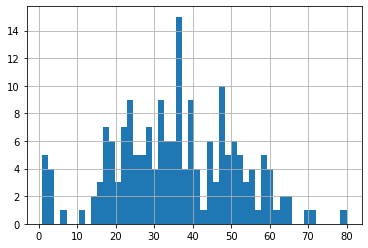

In [4]:
print('---Classes---')
print('Classes : ', data['pclass'].unique())

print('Passenger by Classes :\n', data['pclass'].value_counts().values)

print('--Genre--')
print('Genre : ', data['sex'].unique())
print('Passenger by Sex : \n', data['sex'].value_counts().values)

data['age'].hist(bins= 50)

On ne connait pas spécialement bien toute les colonnes mais on peut imaginer compter aussi les colonnes à variables binaires comme le sexe. 
On peut aussi faire un histogramme du tarif que chacun à du payer pour regarder la répartiion des différentes dépenses.

---Tickets---
Ticket :  ['PC 17599' '113803' '17463' 'PP 9549' '113783' '248698' '113788' '19950'
 'PC 17572' '113509' '36973' 'C.A. 29395' '348123' 'W.E.P. 5734'
 'PC 17754' 'PC 17759' '35281' '110465' 'PC 17558' '27267' '11752'
 'PC 17593' '230080' '113776' '111240' '17764' 'PC 17595' '230136'
 'PC 17610' 'PC 17569' '347054' '112277' '35273' '11813' '19943' '19928'
 '11751' '113514' '110152' '110413' '112059' 'PC 17582' 'PC 17760'
 'PC 17596' '13502' '11967' 'SC/Paris 2163' '113781' 'PC 17758' 'PC 17485'
 '11767' 'PC 17608' '36928' '16966' '28551' '111361' '113043' '113784'
 '248733' '113505' '110813' 'PC 17477' '11765' '113503' '113760'
 'SOTON/O.Q. 392078' '110564' '13507' '33638' '113786' '113051' '17453'
 '13509' '19952' '111320' 'SC/AH Basle 541' '11771' '113787' '36947'
 'PC 17473' '36967' 'C.A. 34260' '12749' '113050' '13568' 'WE/P 5735'
 'PC 17761' '17421' '11755' '11769' 'PC 17474' '13049' '13567' '11753'
 '36963' '27042' '13214' '13213' '5727' 'F.C. 12750' 'PC 17755' '24160

<AxesSubplot:>

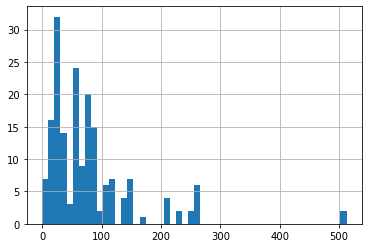

In [5]:
print('---Tickets---')
print('Ticket : ', data['ticket'].unique())

print('Passenger by Ticket :\n', data['ticket'].value_counts().values)

print('Passenger Arrived : \n', data['survived'].value_counts().values)

data['fare'].hist(bins= 50)

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
One hot Encoding
</h2>

In [6]:
X = data[['pclass', 'sex', 'age', 'embarked']].copy()

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

data['sex'] = lb.fit_transform(X['sex'])
data['embarked'] = lb.fit_transform(X['embarked'])

display(data)
data = data.drop(['name', 'ticket', 'cabin'], axis = 1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,0
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0


In [7]:
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.1)
display(y_train)

341    1
305    1
54     0
550    1
583    0
      ..
257    1
263    0
291    1
671    0
647    1
Name: survived, Length: 164, dtype: int64

In [8]:
def print_score(clf, X_train, y_train, X_test, y_test, train):
    if train:
        print("Train Result:\n")
        print("Accuracy Score: {:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report:\n{}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
    else:
        print("Test Result:\n")
        print("Accuracy Score: {:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report:\n{}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, clf.predict(X_test))))


clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train = True)
print_score(clf, X_train, y_train, X_test, y_test, train = False)

Train Result:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       109

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164


Confusion Matrix:
[[ 55   0]
 [  0 109]]

Test Result:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        14

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19


Confusion Matrix:
[[ 5  0]
 [ 0 14]]



On obtiens des scores très bon ce qui est un peu étrange. Le nombre de d'estimaterus va augmenter le temps d'entraînement et possiblement le score.

In [9]:
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train = True)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train = True)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train = True)

Train Result:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       109

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164


Confusion Matrix:
[[ 55   0]
 [  0 109]]

Train Result:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       109

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164


Confusion Matrix:
[[ 55   0]
 [  0 109]]

Train Result:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       

Text(0.5, 0, 'Random Forest feature importance')

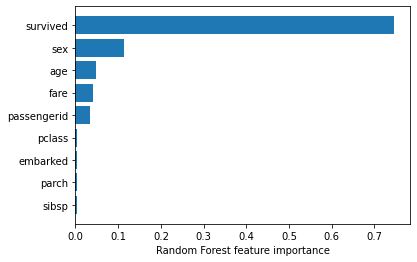

In [10]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest feature importance")

On voit que pour prédire si un passager survit ou non on dépend évidemment de survived. Mais aussi le sexe et l'age sont deux paramètre importants.

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Grid Search
</h2>

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [12]:
rf_cls = RandomForestClassifier(random_state=42)

params_grid = {"max_depth" : [1, 10], 
                   "min_samples_split" : [2, 3, 10], 
                   "min_samples_leaf" : [1, 3, 10], 
                   "bootstrap" : [True, False], 
                   "criterion" : ['gini', 'entropy'], 
                   "n_estimators" :[10, 20, 30]}

grid_search = GridSearchCV(rf_cls, params_grid,
                           n_jobs = -1, cv= 5, 
                           verbose = 1, scoring= 'accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [1, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy', verbose=1)

In [13]:
grid_search.best_score_
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

<h1 style="color:white; background-color: #5F9EA0; padding:15px; text-align: center;">
Second Part
</h1>

In [22]:
#from visualization import plot_2d_data, plot_2d_classifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_moons

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Data
</h2>

In [ ]:
X, y = make_moons(n_samples= 500, noise = 0.2)

X = np.concatenate((X, [[-1.15, 0.8]]))
Y = np.concatenate((y, [1]))

y = 2*y - 1

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Visualisation
</h2>

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize= (12,5))

ax.scatter([-1.15],[ 0.8 ], marker = 'o', s=200, c= 'w', edegecolors='k')
plot_2d_data(ax, X, y, alpha = 0.75, s=30, 
             title = 'Data set with outlier', colormap='RdBu')

ax.set_xticks([])
ax.set_yticks([])

In [ ]:
for t in range(n_estimators):
    D = D / np.sum(D)
    S = D / np.mex(D)

    S[(0.00 <= S) & (S < 0.25)] = 2

    S[(0.25 <= S) & (S < 0.50)] = 16

    S[(0.50 <= S) & (S < 0.75)] = 64

    S[(0.75 <= S) & (S <= 1.00)] = 128

    if t in [0, 1, 2, 4, 7, 11, 14] :
        axis_index += 1
        r,c = np.divmod(axis_index, 4)
        title = '   Iteration {0}: Sample weights'.format(t + 1)
        plot_2d_data(ax[r, c], X, y, alpha=0.75, s=s, title=title, colormap='RdBu')
        ax[r, c].set_xticks([])
        ax[r, c].set_ytiekS([])

    h = DecisionTreeClassifier(max_depth=1,
                                criterion = 'entropy') 
    h.fit(X, y, sample_weight=D) # Train a weak learner using sample weights
    ypred = h.predict(X) # Predict using the weak learner

    e = 1 - accuracy_score(y, ypred, sample_weight=D) | # Weighted orror of the weak learner
    a = 0.5 * np.log((1 - e) / e) # Weak learner weight

    m= (y == ypred) * 1 + (y != ypred) * -1 # Identify correctly classified and misclassified points
    D += np.exp(-a * m) # Update the sample weights

    ensemble.append((a, h)) # Save the weighted weak hypothesis

fig.tight_layout()

In [23]:
n_estimators_steps, n_folds = 5,10
number_of_stumps = np.arange(5, 50, n_estimators_steps)
splitter = StratifiedKFold(n_splits = n_folds, shuffle = True)

trn_err = np.zeros((len(number_of_stumps), n_folds))
val_err = np.zeros((len(number_of_stumps), n_folds))

NameError: name 'StratifiedKFold' is not defined

In [24]:
stump = DecisionTreeClassifier(max_depth = 1)

Ici on travaille avec un arbre de profondeur 1, permettant de classer une relation linéaire entre les variables. On évite ainsi le surapprentissage. On obtient aussi un résultat plus facilement interprétable avec un temps de calcul plus rapide.

In [25]:
for i, n_stumps in enumerate(number_of_stumps) : 
    for j, (trn, val) in enumerate(splitter.split(X,y)) : 

        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump, 
                                   n_estimator=n_stumps, learning_rate=1.0)
        model.fit(X[trn,:], y[trn])

        trn_err[i, j] = 1 - accuracy_score(y[trn], model.predict(X[trn, :]))
        trn_err[i, j] = 1 - accuracy_score(y[val], model.predict(X[val, :]))

trn_err = np.mean(trn_err, axis = 1)
val_err = np.mean(val_err, axis = 1)

NameError: name 'splitter' is not defined

NameError: name 'trn_err' is not defined

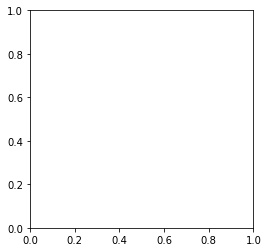

In [26]:
fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (4,4))

ax.plot(number_of_stumps, trn_err, marker ='o', c =cm[0], markeredgecolor = 'w', linewidth=2)
ax.plot(number_of_stumps, val_err, marker ='o', c =cm[1], markeredgecolor = 'w', linewidth=2)
ax.legend(['Train err', 'Validation err'])
ax.set_xlabel('Number of decision stumps')
ax.set_ylabel('Error (%)')

fig.tight_layout()

<h1 style="color:white; background-color: #5F9EA0; padding:15px; text-align: center;">
Third Part
</h1>

In [3]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

(-0.5, 79.5, 79.5, -0.5)

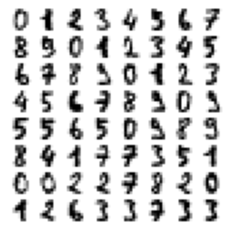

In [6]:
fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (4,4))

n_img_per_row = 8
img = np.zeros((10*n_img_per_row, 10 * n_img_per_row))

for i in range(n_img_per_row) : 
    ix = 10*i + 1
    for j in range (n_img_per_row) : 
        iy = 10*j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8,8))

ax.imshow(img, cmap = plt.cm.binary)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

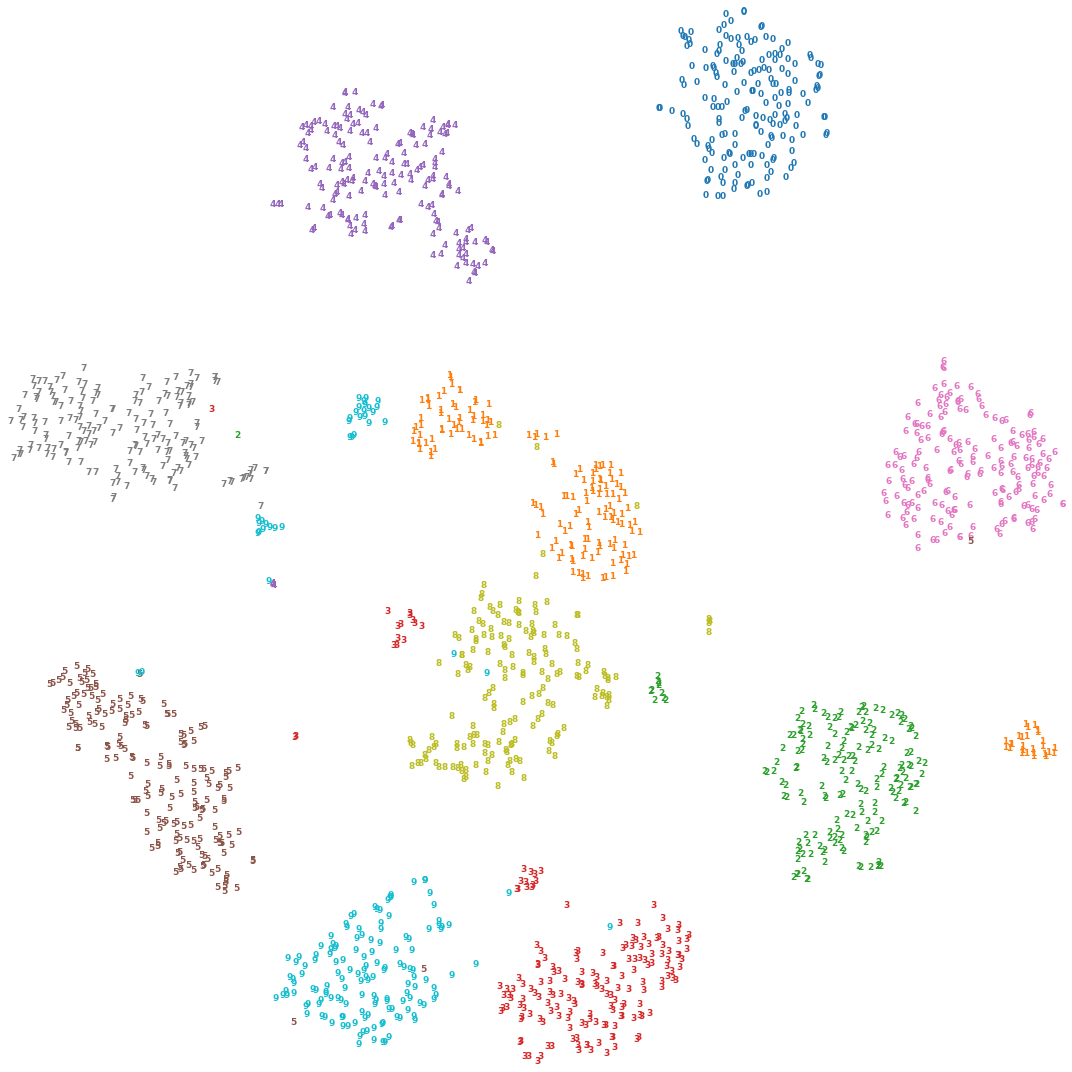

In [7]:
from sklearn.manifold import TSNE
Xemb = TSNE(n_components=2).fit_transform(X)

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (15,15))
xMin, xMax = np.min(Xemb, axis = 0), np.max(Xemb, axis = 0 )
Xemb = (Xemb - xMin) / (xMax - xMin)

for i in range (Xemb.shape[0]) : 
    plt.text(Xemb[i, 0], Xemb[i, 1], str(y[i]), color = plt.cm.tab10(y[i]/10.), fontdict={'weight' : 'bold', 'size' : 9})

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
fig.tight_layout()

In [8]:
Xtrn, Xtst, ytrn, ytst = train_test_split(Xemb, y, test_size=0.2, stratify=y )

Le paramètre stratify permet de conserver la proportion de chaque classe dans chacun des ensemble d entrainement et de test. L'utilisation de stratify est utile pour les ensembles de données déséquilibrés, où la répartition des étiquettes de classe n'est pas uniforme. La stratification peut aider à prévenir le biais et à garantir que les performances du modèle sont évaluées de manière juste et impartiale pour chaque classe.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

stump = DecisionTreeClassifier(max_depth= 1)
ensemble = AdaBoostClassifier(base_estimator= stump)

ensemble.fit(Xtrn, ytrn)
y_pred = ensemble.predict(Xtst)
score = ensemble.score(Xtst, ytst)

stump2 = DecisionTreeClassifier(max_depth=2)
ensemble2 = AdaBoostClassifier(base_estimator=stump2)
ensemble2.fit(Xtrn, ytrn)
y_pred2 = ensemble2.predict(Xtst)
score2 = ensemble2.score(Xtst, ytst)

stump3 = DecisionTreeClassifier(max_depth=3)
ensemble3 = AdaBoostClassifier(base_estimator=stump3)
ensemble3.fit(Xtrn, ytrn)
y_pred3 = ensemble3.predict(Xtst)
score3 = ensemble3.score(Xtst, ytst)

print("Performance avec 1 : ", score)
print("Performance avec 2 : ", score2)
print("Performance avec 3 : ", score3)

Performance avec 1 :  0.3
Performance avec 2 :  0.9388888888888889
Performance avec 3 :  0.9777777777777777


Lorsque nous augmentons la profondeur de l'arbre de décision utilisé comme base dans l'algorithme AdaBoost, nous pouvons observer un effet sur la performance du modèle. Une profondeur plus grande peut aider le modèle à capturer des relations plus complexes dans les données, mais cela peut également augmenter le risque de surapprentissage et rendre le modèle plus complexe. \
Comme on voit que les valeurs augmente avec la profondeur on peut en déduire que cela peut indiquer que le modèle est capable de capturer des relations plus complexes dans les données.

In [14]:
parameters_to_search = {'n_estimators': [200, 300, 400], 
                        'learning_rate': [0.6, 0.8, 1.0]}

base_estimator, algorithm, random_state, loss, ...

In [15]:
from sklearn.metrics import balanced_accuracy_score, make_scorer
scorer = make_scorer(balanced_accuracy_score, greater_is_better=True)

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(ensemble, param_grid = parameters_to_search, 
                      scoring=scorer, cv = 5, n_jobs = -1, refit = True)

search.fit(Xtrn, ytrn)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.6, 0.8, 1.0],
                         'n_estimators': [200, 300, 400]},
             scoring=make_scorer(balanced_accuracy_score))

In [17]:
best_combo = search.cv_results_['params'][search.best_index_]
best_score = search.best_score_
print("The best parameters setting are {0}, with score = {1}.".format(best_combo, best_score))

ypred = search.best_estimator_.predict(Xtst)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix : \n {0}".format(confusion_matrix(ytst, ypred)))

The best parameters setting are {'learning_rate': 0.8, 'n_estimators': 300}, with score = 0.6500392264185367.
Confusion Matrix : 
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  4  0  0  0  0]
 [ 0  0 23  0  0  8  0  0  4  0]
 [ 0  0  4 28  0  4  0  0  1  0]
 [ 0  0  0  0 35  0  0  0  0  1]
 [ 0  0  1 35  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  3]
 [ 0  1  0  2  0  0  0  0 29  3]
 [ 0  0  0 12  0  0  0  0  1 23]]


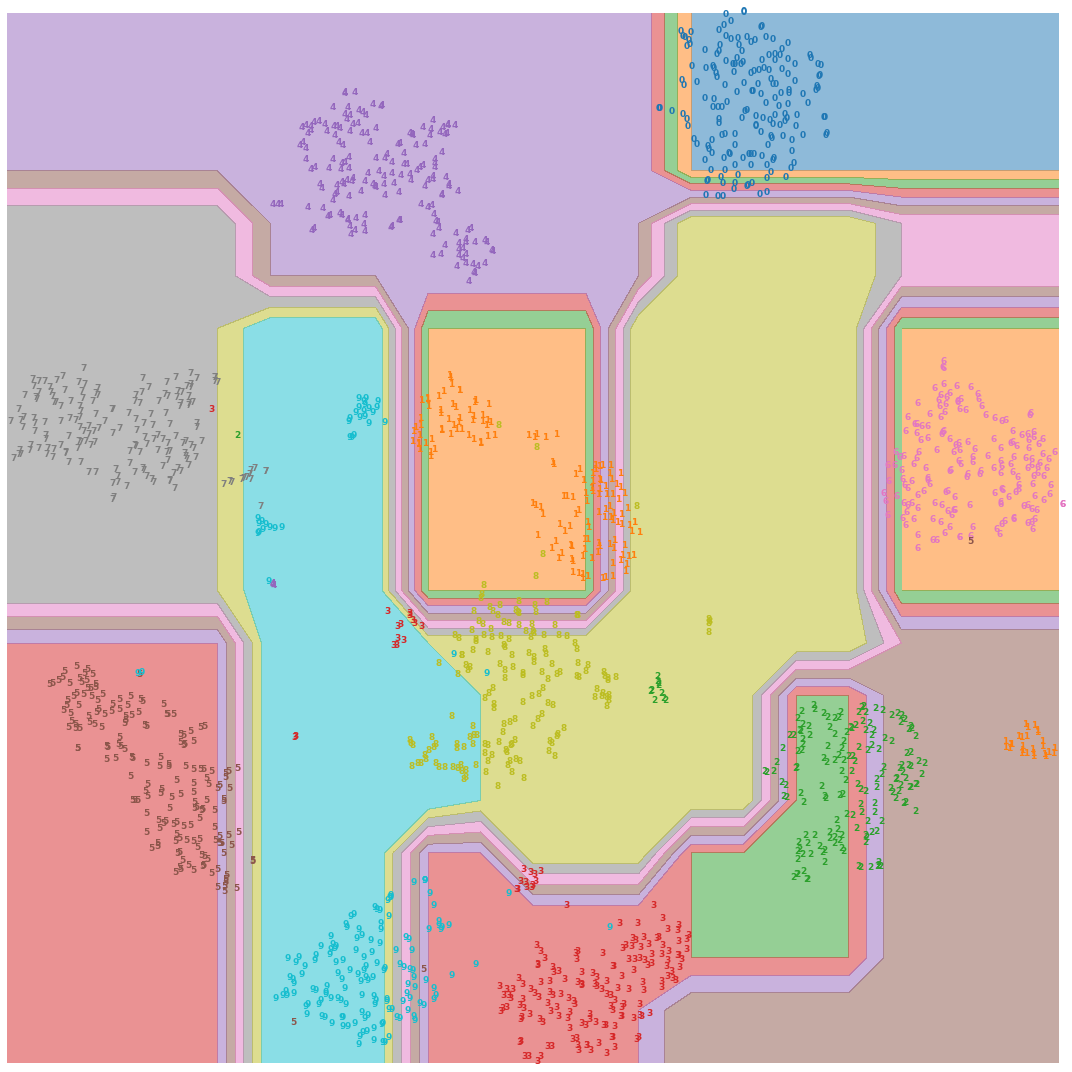

In [18]:
xMin, xMax = Xemb[:, 0].min(), Xemb[:, 0].max() + 0.05
yMin, yMax = Xemb[:, 1].min(), Xemb[:, 1].max() + 0.05

xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.05),
                           np.arange(yMin, yMax, 0.05))

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (15,15))
zMesh = search.best_estimator_.predict(np.c_[xMesh.ravel(), yMesh.ravel()])
zMesh = zMesh.reshape(xMesh.shape) *1.0
boundary = ax.contourf(xMesh, yMesh, zMesh, np.array([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 
                       cmap= plt.cm.tab10, alpha = 0.5)

for i in range(X.shape[0]) : 
    plt.text(Xemb[i, 0], Xemb[i, 1], str(y[i]), color = plt.cm.tab10(y[i]/10.),
             fontdict={'weight': 'bold', 'size' : 9})
    
ax.axis('off')
fig.tight_layout()